In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
matches_df = pd.read_csv("matches.csv")
matches_df.shape

deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.shape

print('Deliveries Data Dimensions:',matches_df.shape)
matches_df.head(30)

deliveries_df.isnull().sum()

print("------------------- NULLS IN DELIVIRIES ------------------")
print(deliveries_df.isnull().sum())

Deliveries Data Dimensions: (756, 18)
------------------- NULLS IN DELIVIRIES ------------------
match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64


In [4]:
# Data Summary
print('our data contain below information different features and their type \n')
print(matches_df.info())
print('There are %d rows and %d columns in the IPL dataset' %(matches_df.shape[0],matches_df.shape[1]))

print('The mathmatical summary is below: \n')
matches_df.describe()

our data contain below information different features and their type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2  

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [5]:
" Queries"
# 1 numbers of Seasons has been took placed so far in IPL
a = np.sort(matches_df['season'].unique())      
print(a)
print('{0} Numbers of seasons has been played in IPL'.format(len(a)))

[2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
12 Numbers of seasons has been played in IPL


In [6]:
# 2 numbers of teams participated in IPL since inception
print('The teams which has been participated since IPL first Season \n')
b = np.sort(matches_df['team1'].unique()) 
print(b)

The teams which has been participated since IPL first Season 

['Chennai Super Kings' 'Deccan Chargers' 'Delhi Capitals'
 'Delhi Daredevils' 'Gujarat Lions' 'Kings XI Punjab'
 'Kochi Tuskers Kerala' 'Kolkata Knight Riders' 'Mumbai Indians'
 'Pune Warriors' 'Rajasthan Royals' 'Rising Pune Supergiant'
 'Rising Pune Supergiants' 'Royal Challengers Bangalore'
 'Sunrisers Hyderabad']


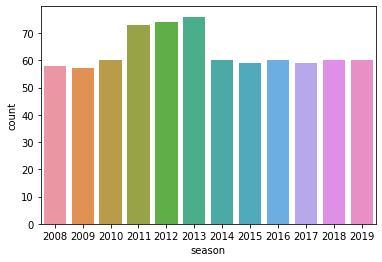

In [7]:
# 3 numbers of matches played per season
sns.countplot(x ='season', data = matches_df)
plt.show()

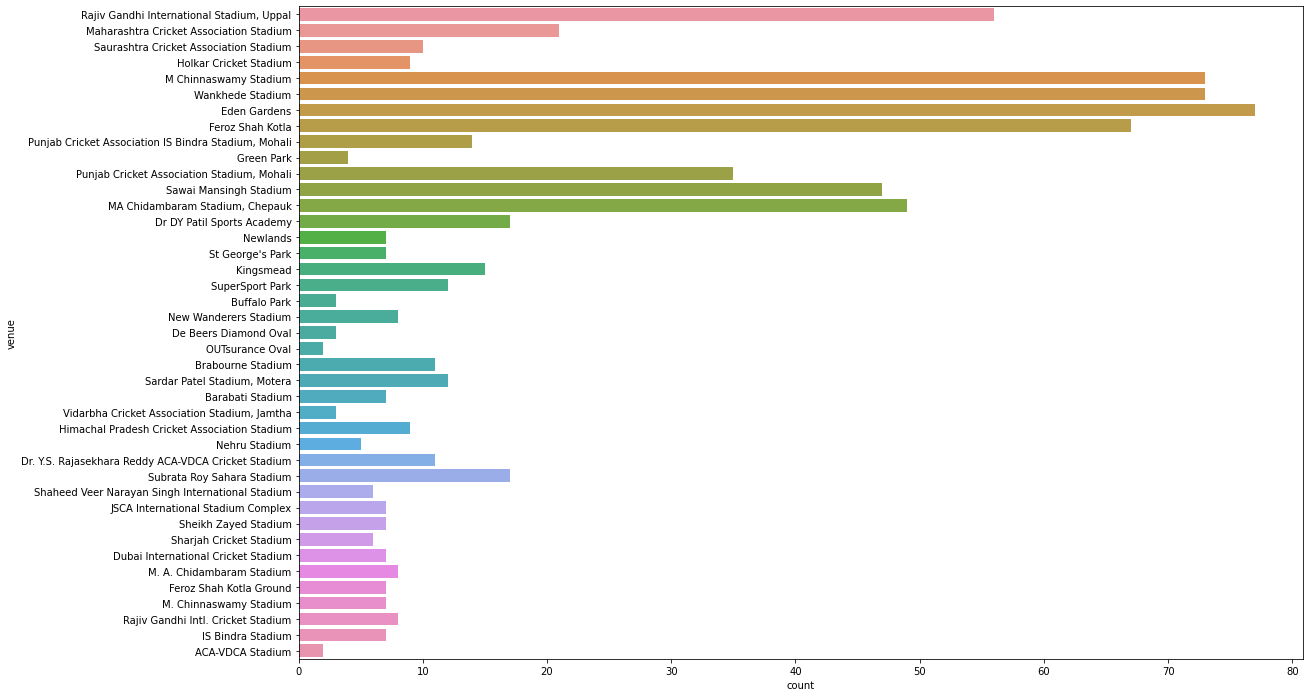

In [8]:
# 4 Plotting matches count per stadium
plt.figure(figsize = (18,12))
sns.countplot(y = 'venue', data = matches_df)
plt.yticks(rotation = 'horizontal')
plt.show()

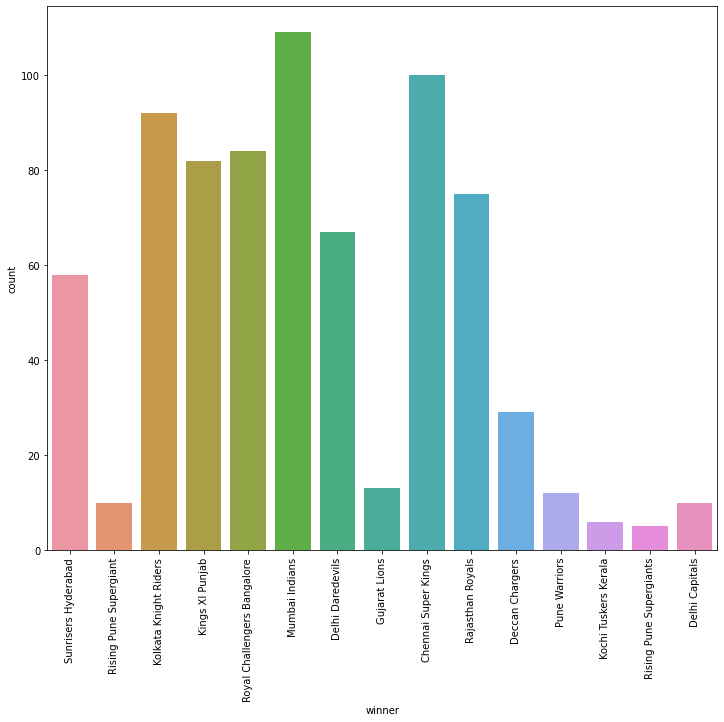

In [9]:
# 5 number of matches won by a team
plt.figure(figsize = (12,10))
sns.countplot(x = matches_df['winner'])
plt.xticks(rotation = 'vertical')
plt.show()

In [8]:
" merging two DataFrame"
merge_df = pd.merge(matches_df, deliveries_df, left_on = 'id', right_on = 'match_id')
print(merge_df.columns)           

merge_df

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [9]:
teams_score_per_season = merge_df.loc[:, ['season', 'match_id', 'batting_team', 'total_runs']]
teams_score_per_season = teams_score_per_season.groupby(['season', 'match_id', 'batting_team'])['total_runs'].agg(np.sum).reset_index()

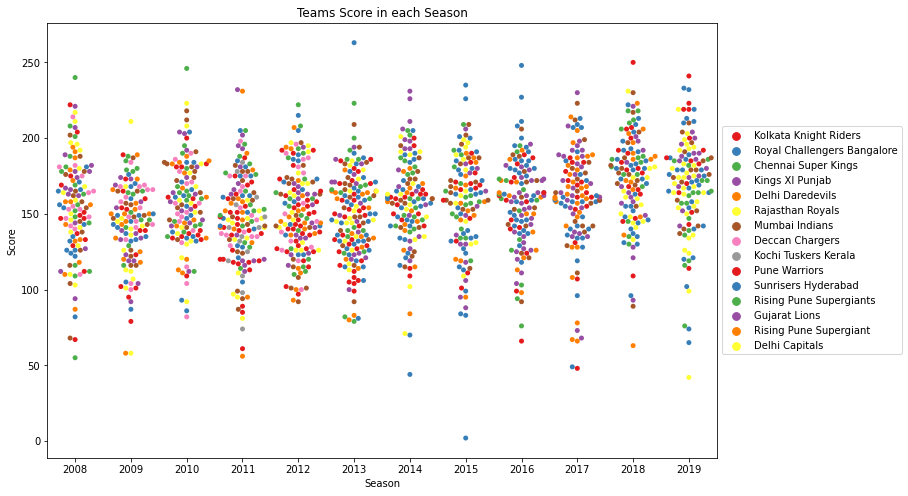

In [10]:
# teams_score_per_season
plt.figure(figsize = (12,8))
ax0 = plt.subplot(111)
g = sns.swarmplot(x='season', y='total_runs', hue='batting_team', data=teams_score_per_season, ax=ax0, palette='Set1')
g.set_title('Teams Score in each Season')
g.set_xlabel('Season')
g.set_ylabel('Score')   
ax0.legend(loc='center left', bbox_to_anchor=(1,0.5))

In [15]:
# top 10 run maker batsman in ipl
bastman_score = merge_df.loc[:, ['batsman','total_runs']]
batsman_score = batsman_score.groupby(['batsman'])['total_runs'].agg(['sum', 'count']).reset_index().rename(columns={'sum': 'total_runs','count': 'balls_count'})
batsman_score['strike_rate'] = np.divide(batsman_score['total_runs'], batsman_score['balls_count'])*100
batsman_score.nlargest(10, ['total_runs'])

NameError: name 'batsman_score' is not defined

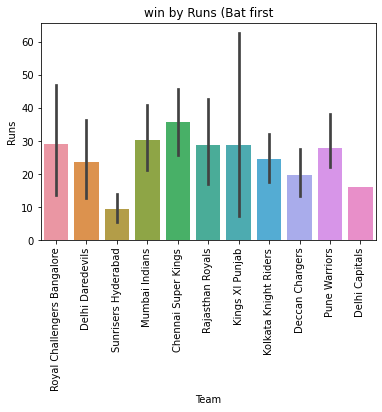

In [16]:
# what is the average 'win_by_runs' for each team
win_by= merge_df.loc[:,['id', 'toss_winner','toss_decision', 'win_by_wickets', 'win_by_runs']]
win_by_runs = win_by[(win_by['toss_decision'] == 'bat') & (win_by['win_by_runs'] !=0)].loc[:,['id', 'toss_winner', 'win_by_runs']].drop_duplicates()

g =sns.barplot(data = win_by_runs, x='toss_winner', y='win_by_runs')
g.set_xlabel('Team')
g.set_ylabel('Runs')
g.set_title('win by Runs (Bat first')
plt.xticks(rotation = 90)
plt.show()

In [18]:
# Most Numbers of "Man of the Matche" Award
top_man_of_matches = merge.df.loc[:,['match_id','player_of_match']].druplop_dicates()
top_man_of_matches = top_man_of_mathces.groupby(['player_of_match'])['match_id'].count().nlarge(5).reset_index().rename(columns = {'match_id':'total_matches'})
top_man_of_matches =
sns.barplot(top_man_of_mathces["player_of_match"],top_man_of_mathces["total_mathces"])

NameError: name 'merge' is not defined

In [19]:
# Gayle
batsman_Score_by_match = deliveries_df[["match_id","batsman","batsman_runs"]]
Batsman_Score_by_match = Batsman_Score_by_match.groupby(["mathc_id","batsman"]).sum()
Batsman_with_centuries = Batsman_Score_by_match[Batsman_Score_by_Match["batsman_runs"]>=100].reset_index()
Batsman_with_centuries = Batsman_with_centuries.groupby("batsman")["match_id"].count().reset_index().sort_values(by="match_id", ascending=False).reset_index(drop =True)
Batsman_with_centuries.columns = ["batsman", "No_of_centuries"]
Batsman_with_centuries

NameError: name 'Batsman_Score_by_match' is not defined